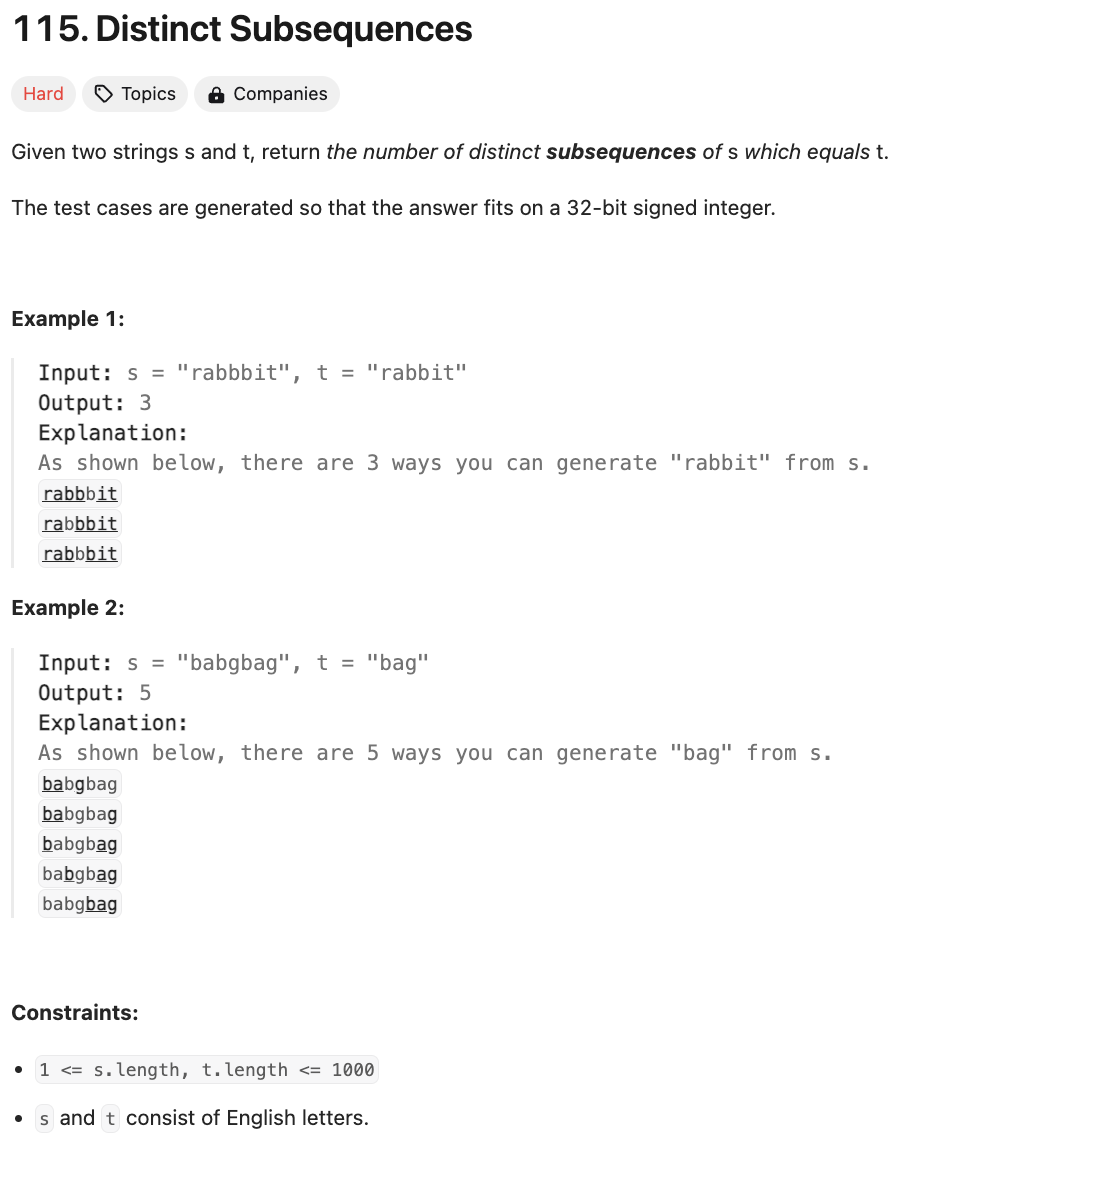

In [1]:
class Solution:
    def numDistinct(self, s: str, t: str) -> int:
        # Memoization dictionary to store results of subproblems
        memo = {}

        def dfs(i, j):
            # Base case 1: If we've matched all characters in t
            if j == len(t):
                return 1
            
            # Base case 2: If we've exhausted s but t still has unmatched characters
            if i == len(s):
                return 0
            
            # Check if the result for (i, j) is already computed
            if (i, j) in memo:
                return memo[(i, j)]

            # Recursive case: Characters match or don't match
            if s[i] == t[j]:
                # Option 1: Use the current character in s to match t[j]
                # Option 2: Skip the current character in s
                memo[(i, j)] = dfs(i + 1, j + 1) + dfs(i + 1, j)
            else:
                # Skip the current character in s
                memo[(i, j)] = dfs(i + 1, j)
            
            return memo[(i, j)]

        # Start the recursion with the initial indices
        return dfs(0, 0)


In [5]:
Solution().numDistinct("rabbbit","rabbit")


3

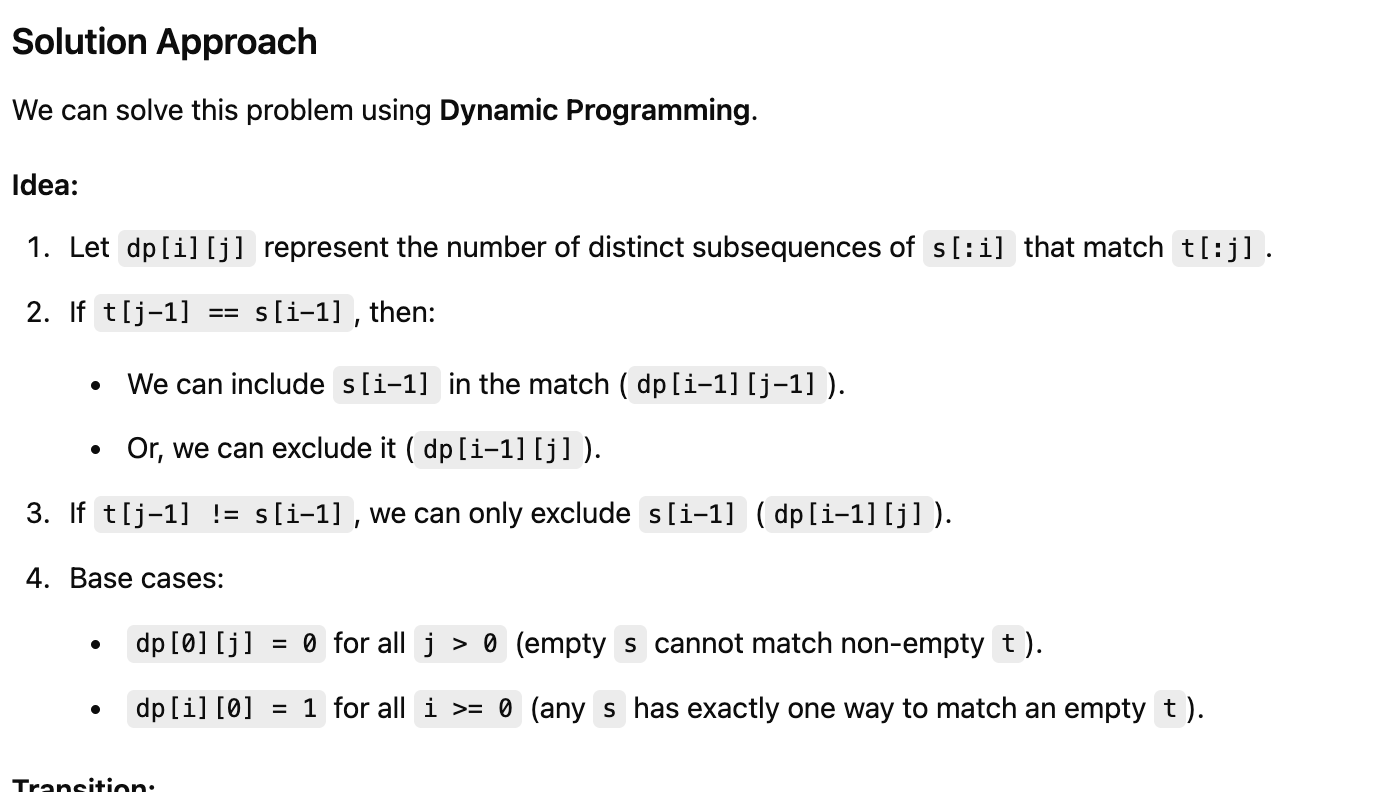

In [ ]:
def numDistinct(s: str, t: str) -> int:
    m, n = len(s), len(t)
    # dp[i][j] will store the number of subsequences of s[:i] that match t[:j]
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Base case: dp[i][0] = 1 for all i (empty t)
    for i in range(m + 1):
        dp[i][0] = 1
    
    # Fill the dp table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s[i - 1] == t[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + dp[i - 1][j]
            else:
                dp[i][j] = dp[i - 1][j]
    
    return dp[m][n]


************************************************************************************************************************************************************************************************************

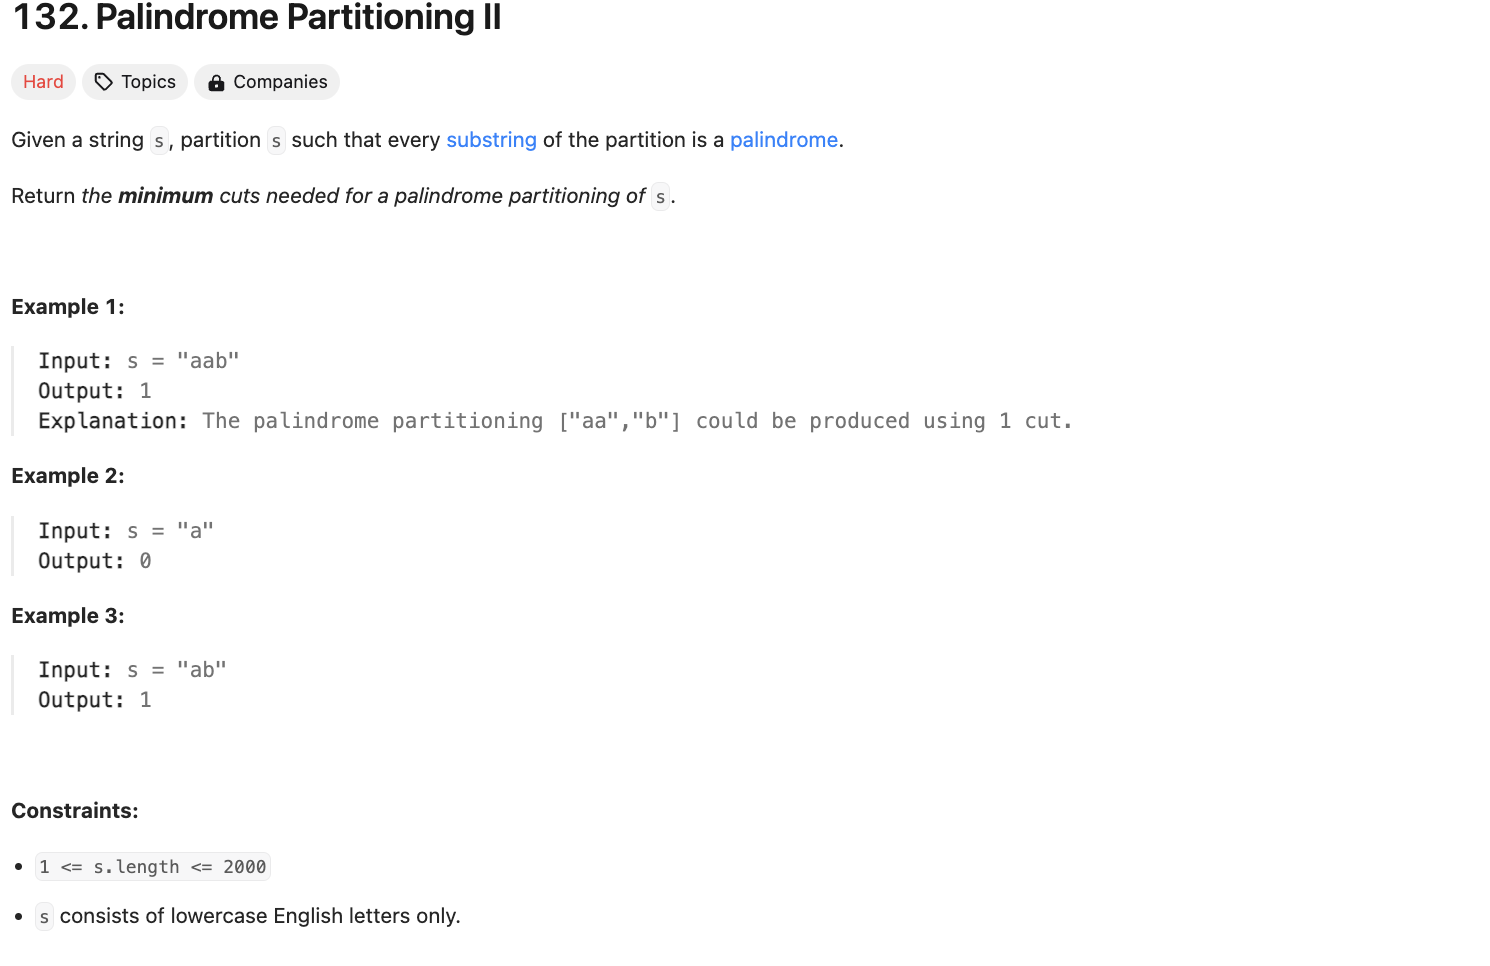

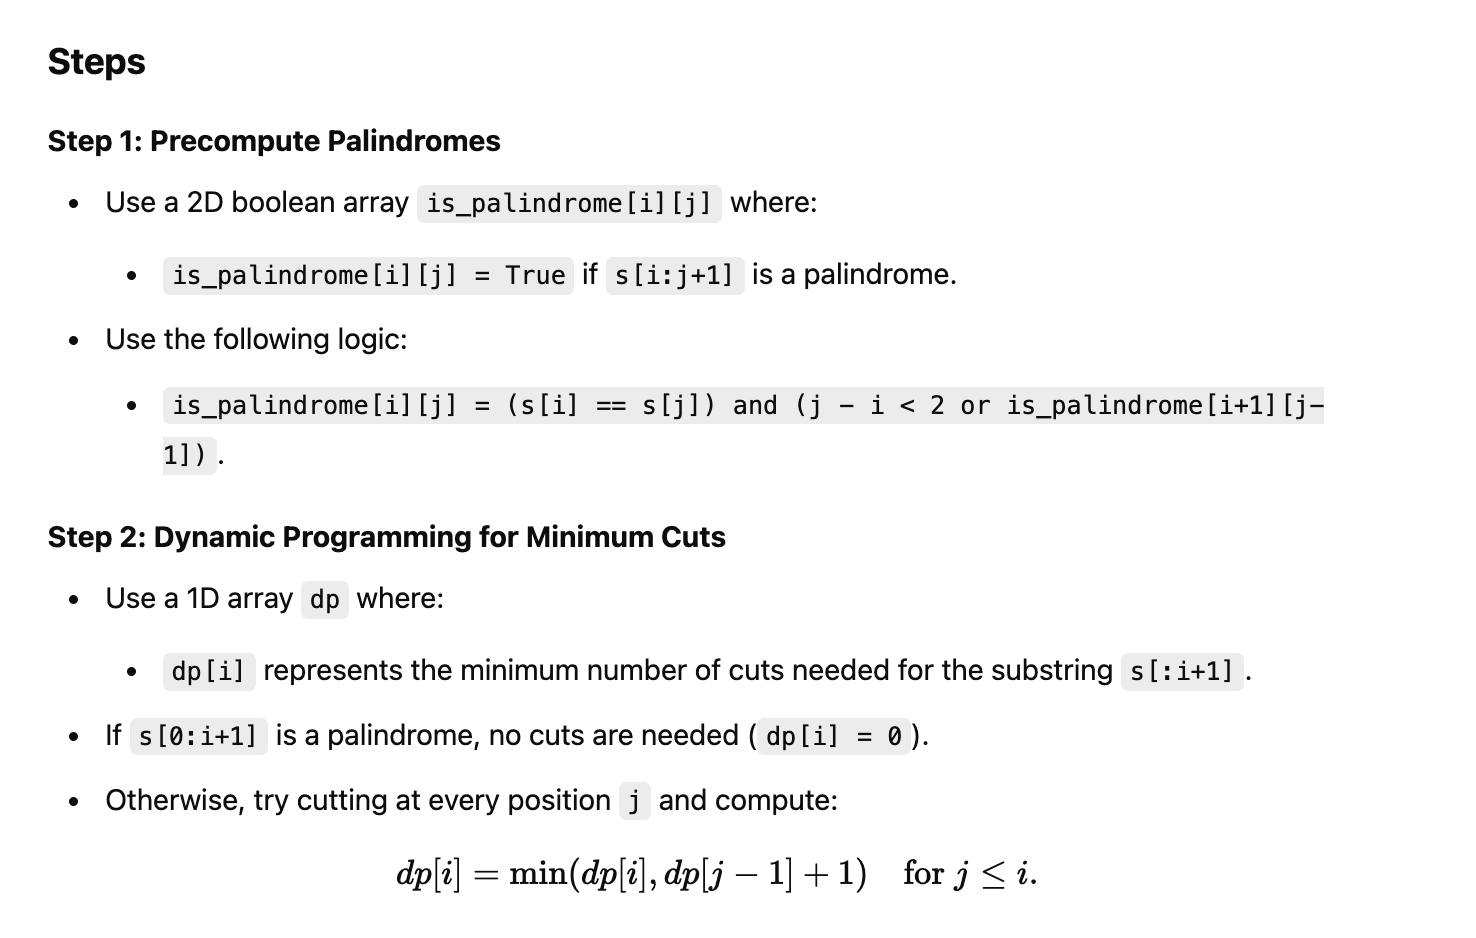

In [18]:
class Solution:
    def minCut(self, s: str) -> int:
        n = len(s)
        
        # Step 1: Precompute palindromes
        is_palindrome = [[False] * n for _ in range(n)]
        for end in range(n):
            for start in range(end + 1):
                #print(start,end)

                if s[start] == s[end] and (end - start < 2 or is_palindrome[start + 1][end - 1]):
                    is_palindrome[start][end] = True
                    
        
        # Step 2: Dynamic Programming for minimum cuts
        dp = [float('inf')] * n
        for i in range(n):
            if is_palindrome[0][i]:
                dp[i] = 0  # No cuts needed if the whole substring is a palindrome
            else:
                for j in range(1, i + 1):
                    if is_palindrome[j][i]:
                        dp[i] = min(dp[i], dp[j - 1] + 1)
        
        return dp[-1]


In [20]:
Solution().minCut("madamabac")

2

************************************************************************************************************************************************************************************************************

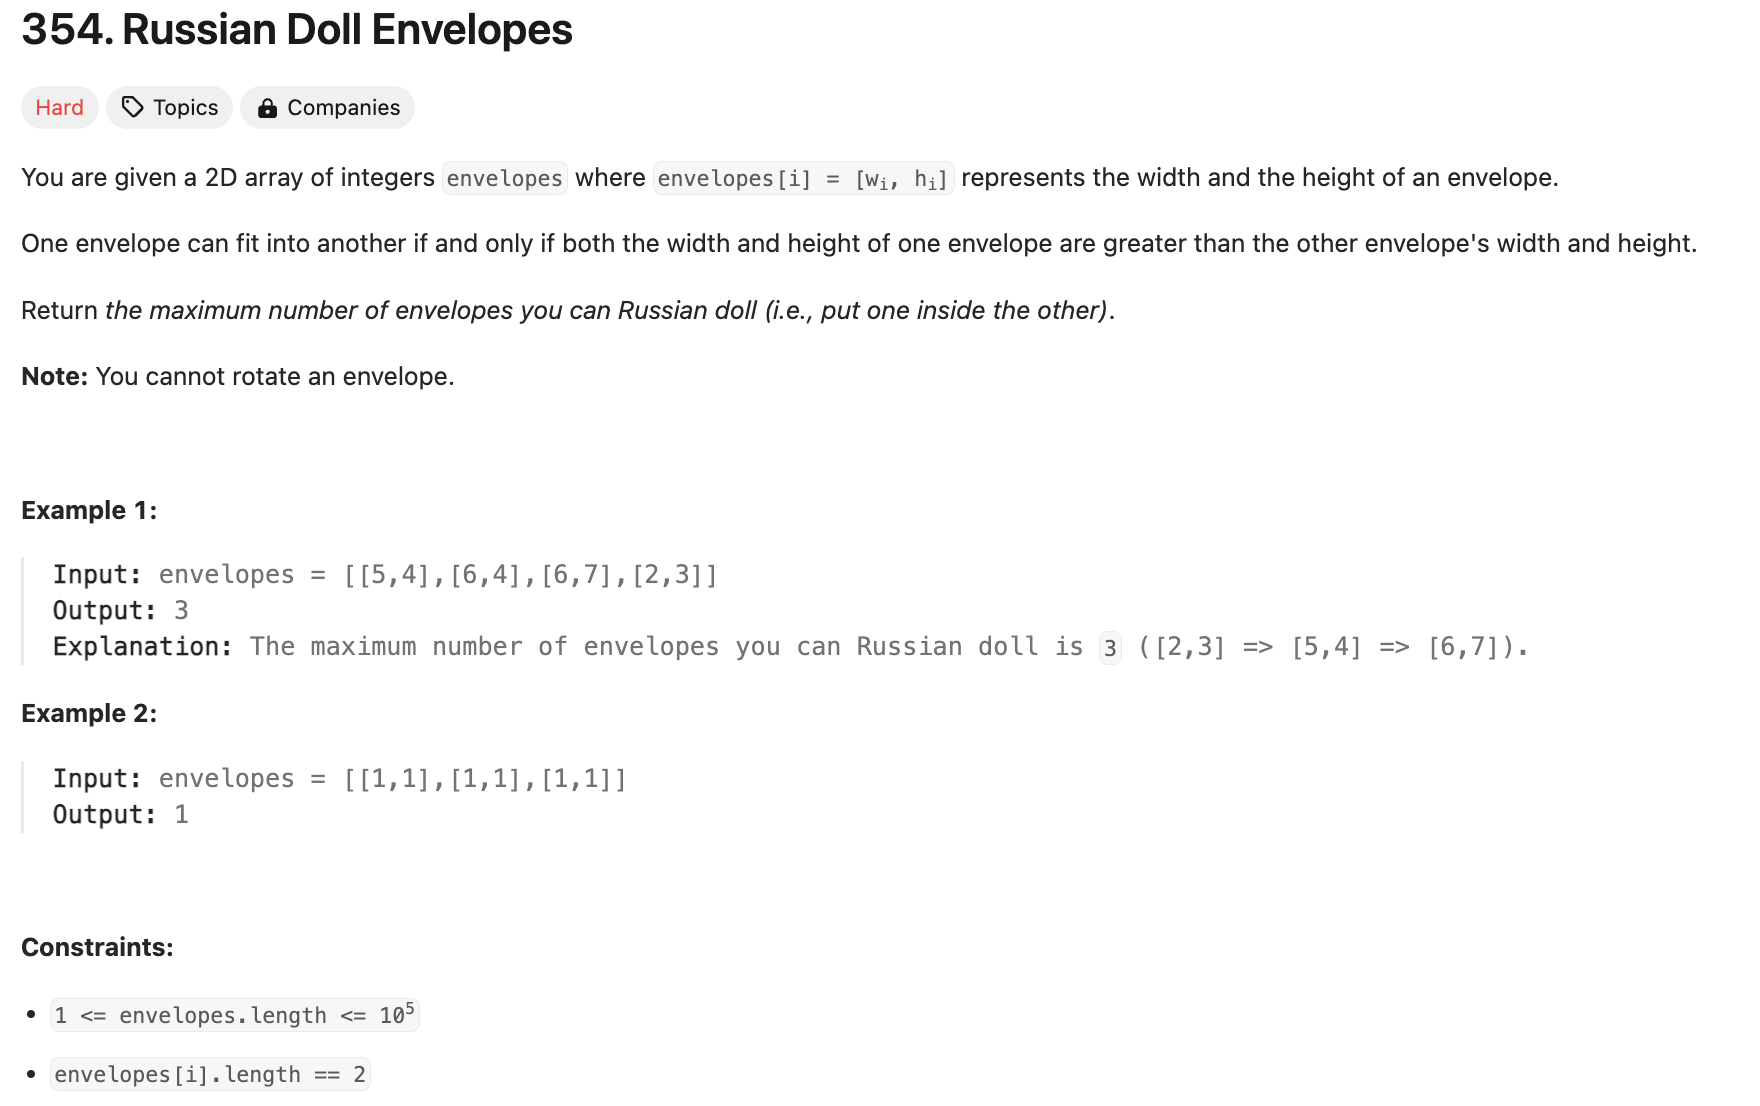

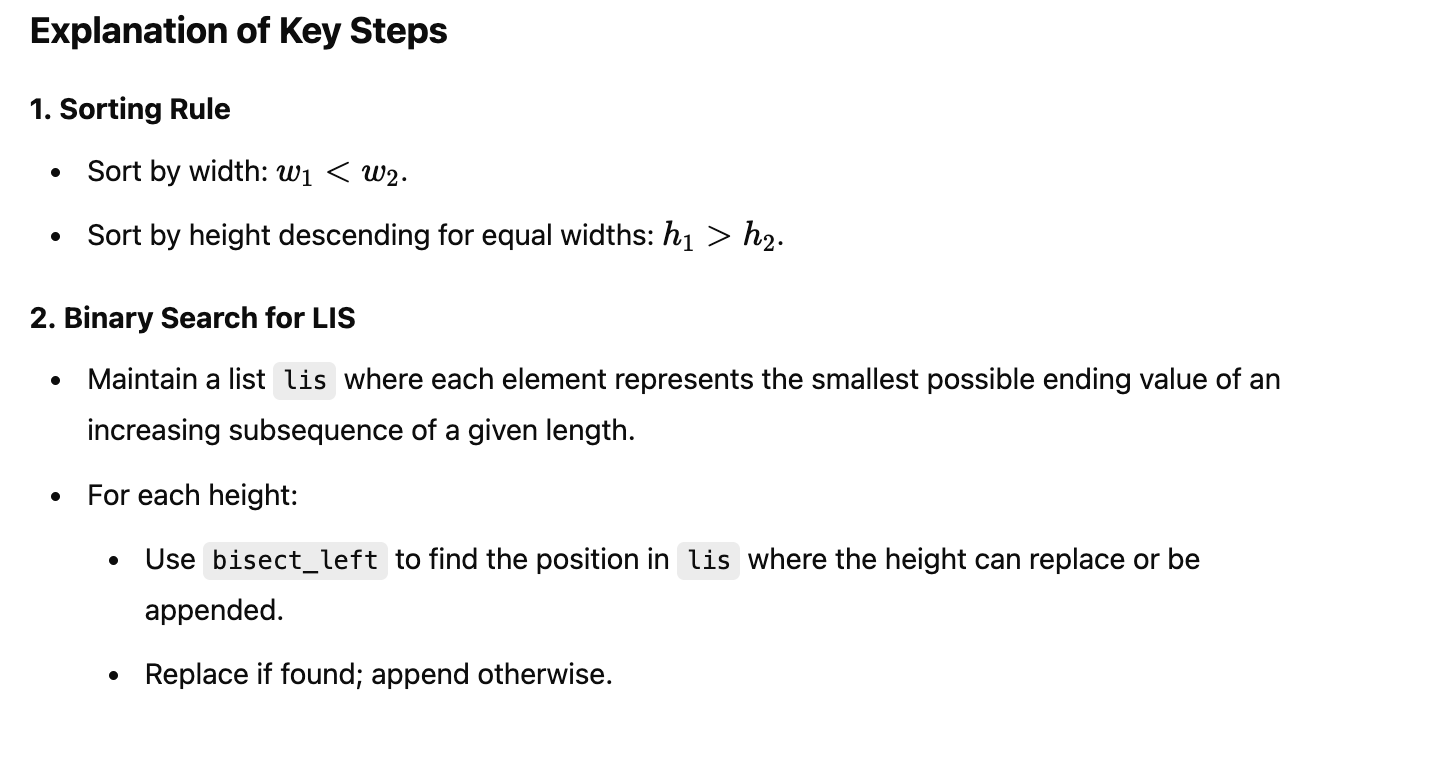

In [22]:
from bisect import bisect_left

class Solution:
    def maxEnvelopes(self, envelopes: list[list[int]]) -> int:
        # Step 1: Sort envelopes by width ascending and height descending
        envelopes.sort(key=lambda x: (x[0], -x[1]))
        
        # Step 2: Extract heights
        heights = [h for _, h in envelopes]
        
        # Step 3: Find LIS in heights
        # Initialize an empty list to store the LIS
        lis = []
        for h in heights:
            # Use binary search to find the position to replace or append
            pos = bisect_left(lis, h)
            if pos == len(lis):
                lis.append(h)
            else:
                lis[pos] = h
        
        return len(lis)


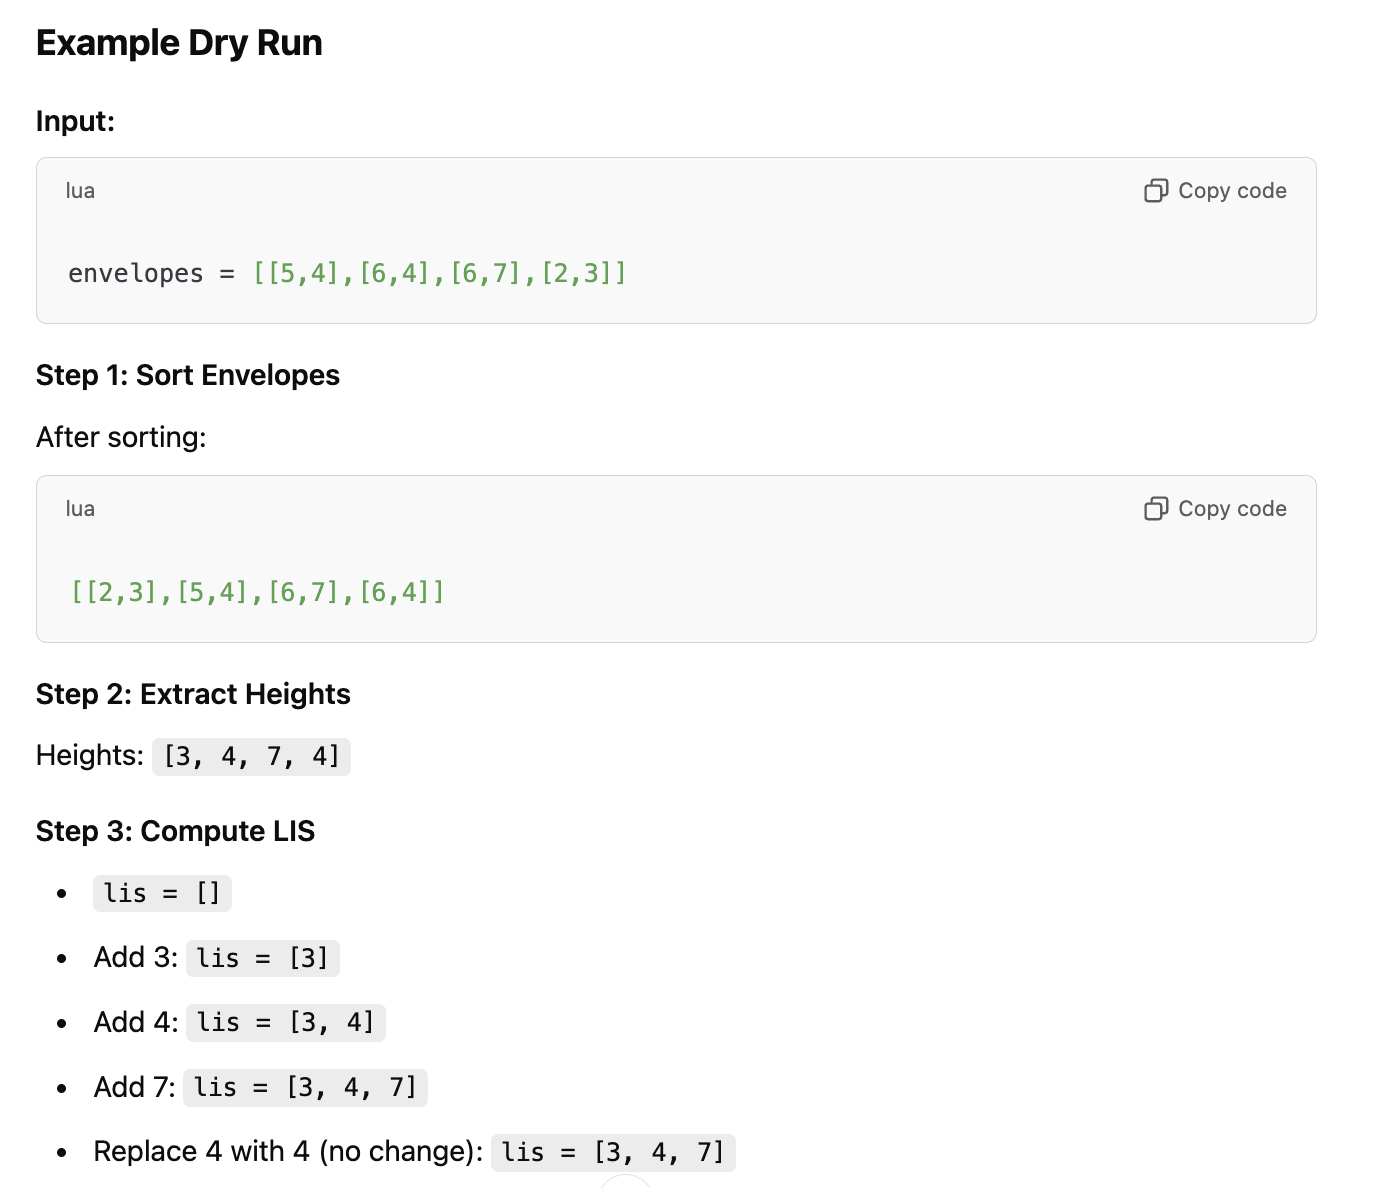

In [28]:
envelopes = [[5,4],[6,4],[6,7],[2,3],[1,2]]
Solution().maxEnvelopes(envelopes)

4

************************************************************************************************************************************************************************************************************

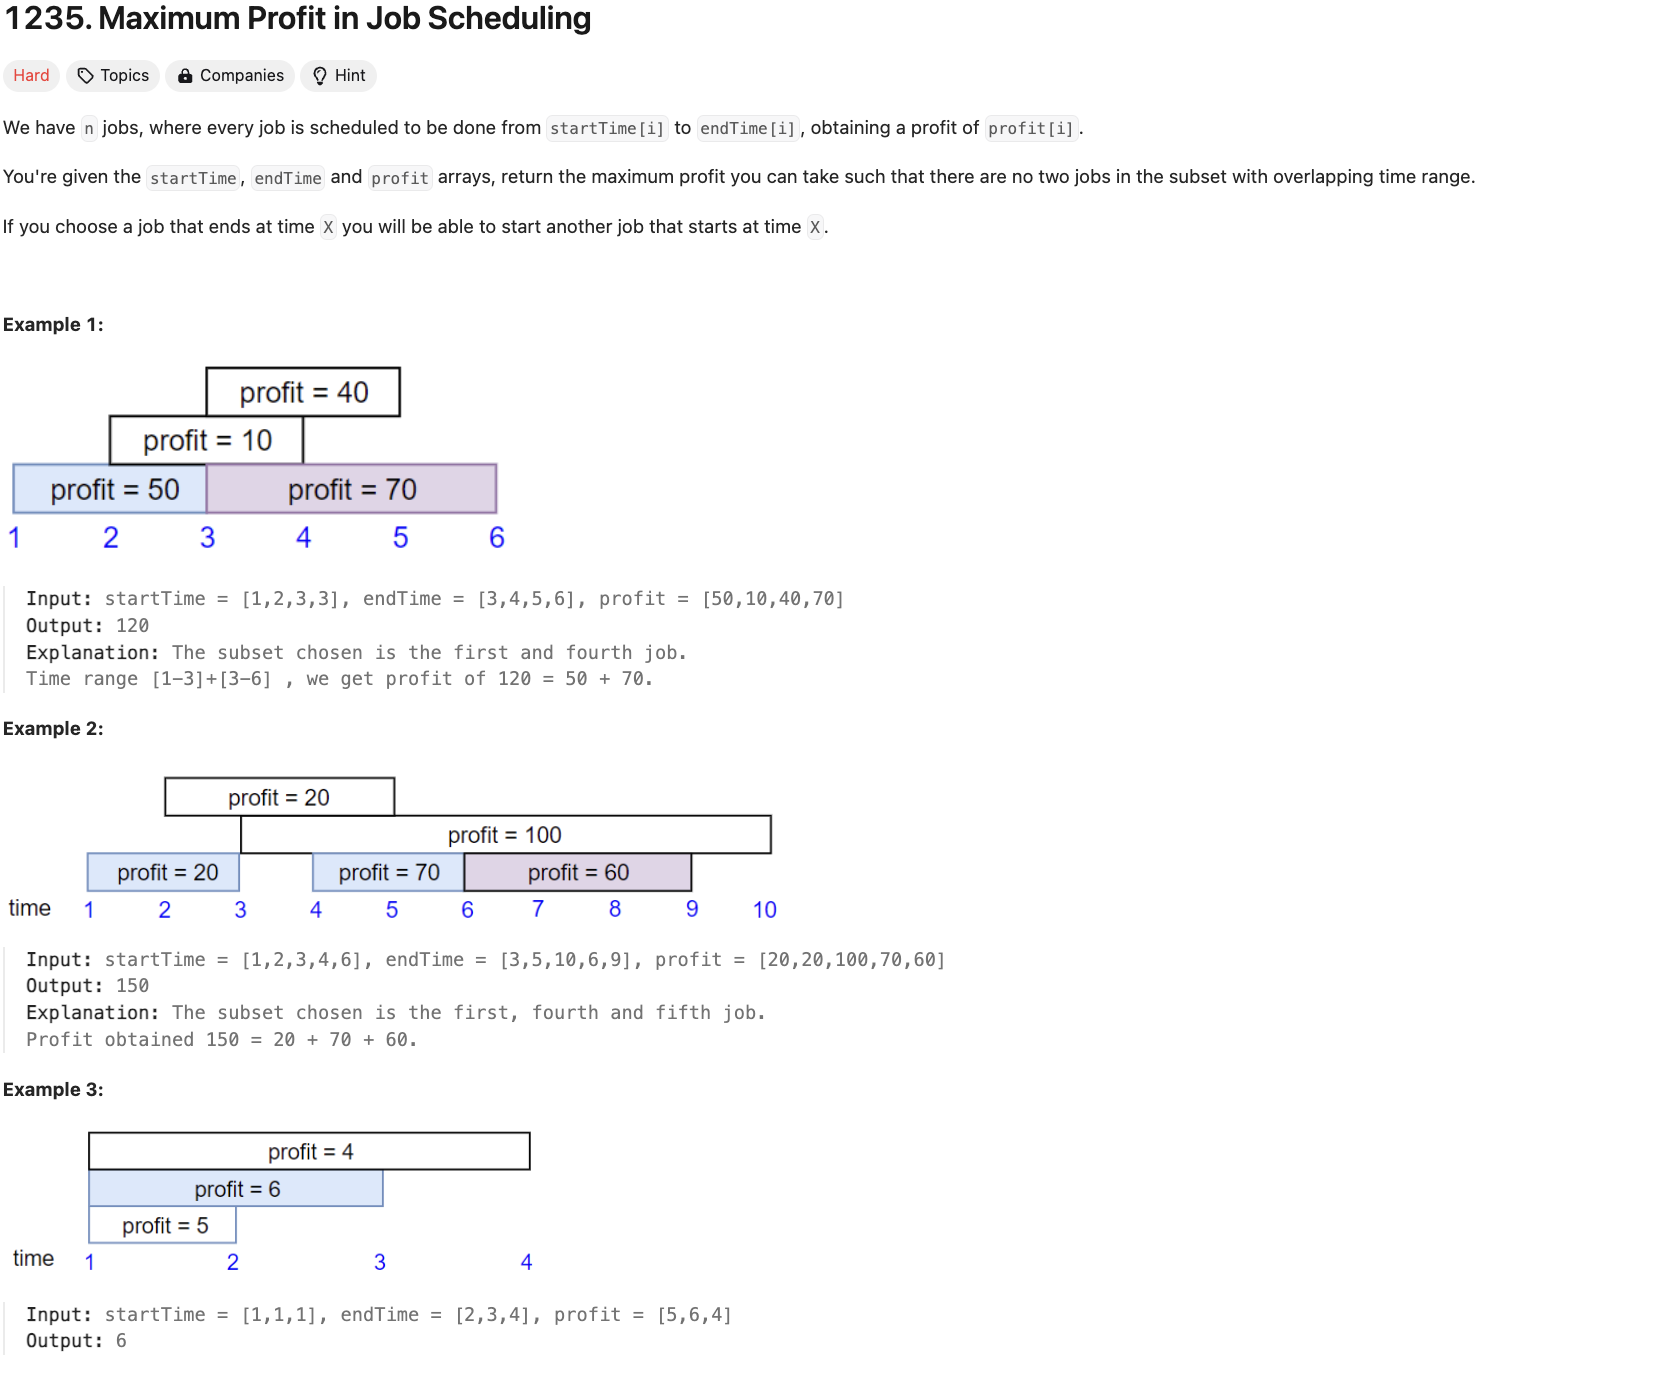

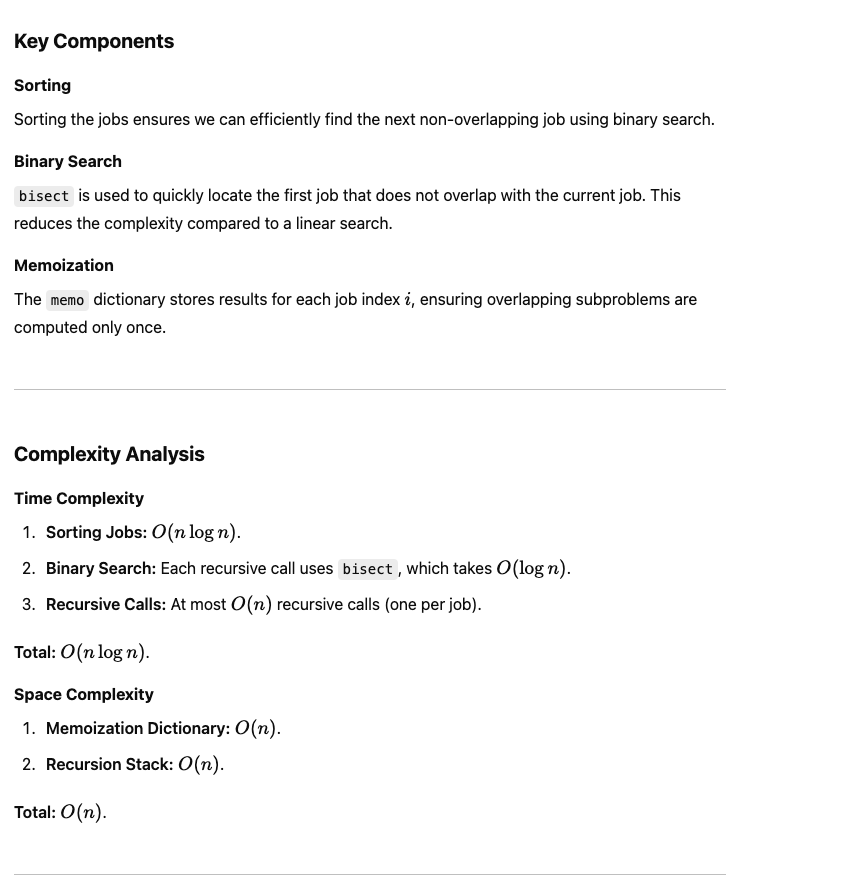

In [30]:
import bisect
from typing import List 
class Solution:
    def jobScheduling(self, startTime: List[int], endTime: List[int], profit: List[int]) -> int:
        jobs=sorted(zip(startTime,endTime,profit))

        memo={}

        def dfs(i):
            if i ==len(jobs):
                return 0
            if i in memo:
                return memo[i]

            #don't include
            res = dfs(i+1)

            #find out the j whre i is not overlapping
            index= bisect.bisect(jobs,(jobs[i][1],-1,-1))

            #do include 
            res=memo[i]= max(res, jobs[i][2]+dfs(index))

            return res

        return dfs(0)

In [32]:
startTime = [1, 2, 3, 3]
endTime = [3, 4, 5, 6]
profit = [50, 10, 40, 70]

Solution().jobScheduling(startTime, endTime, profit)

120

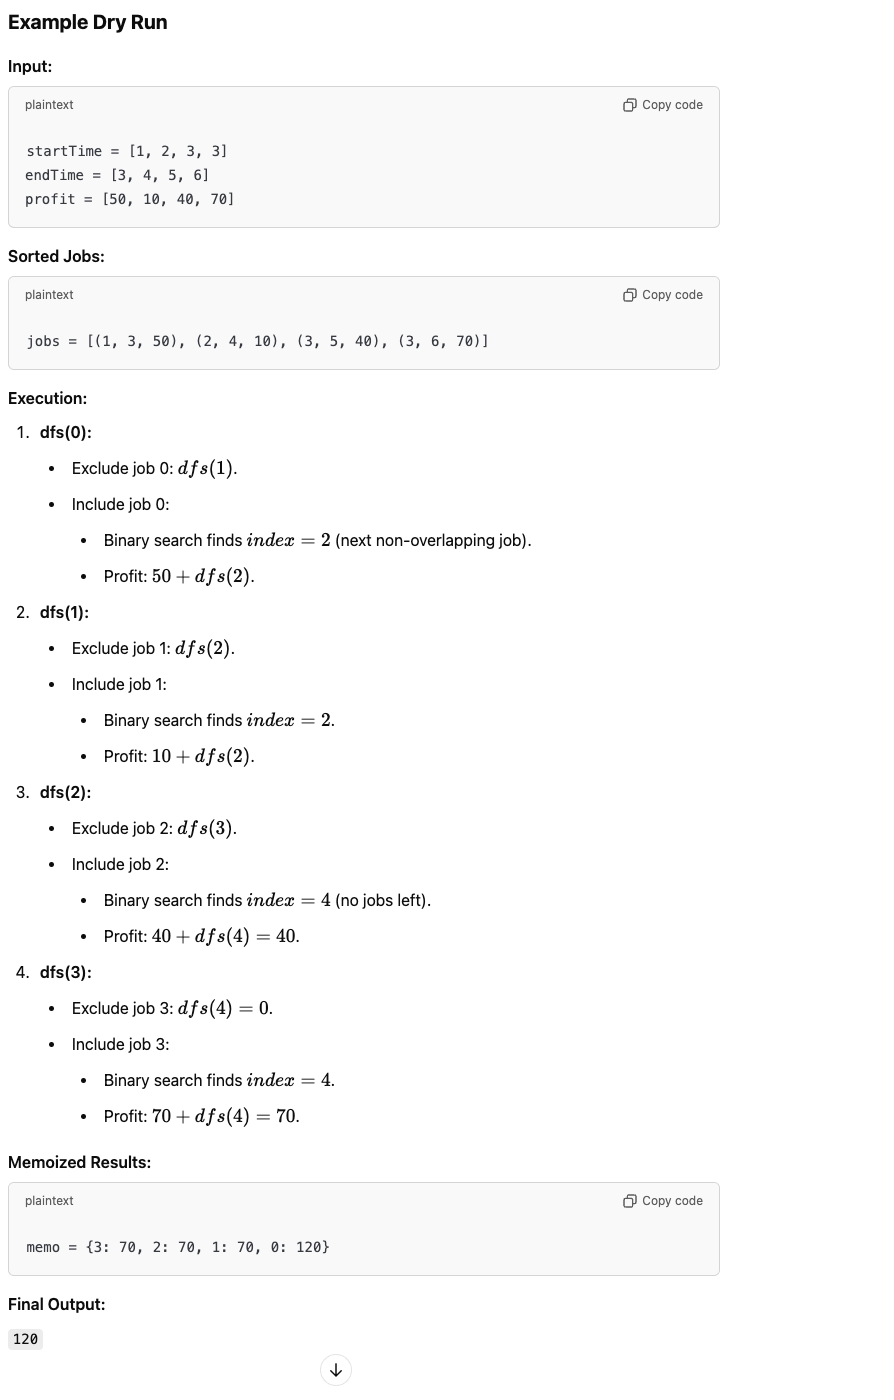

************************************************************************************************************************************************************************************************************


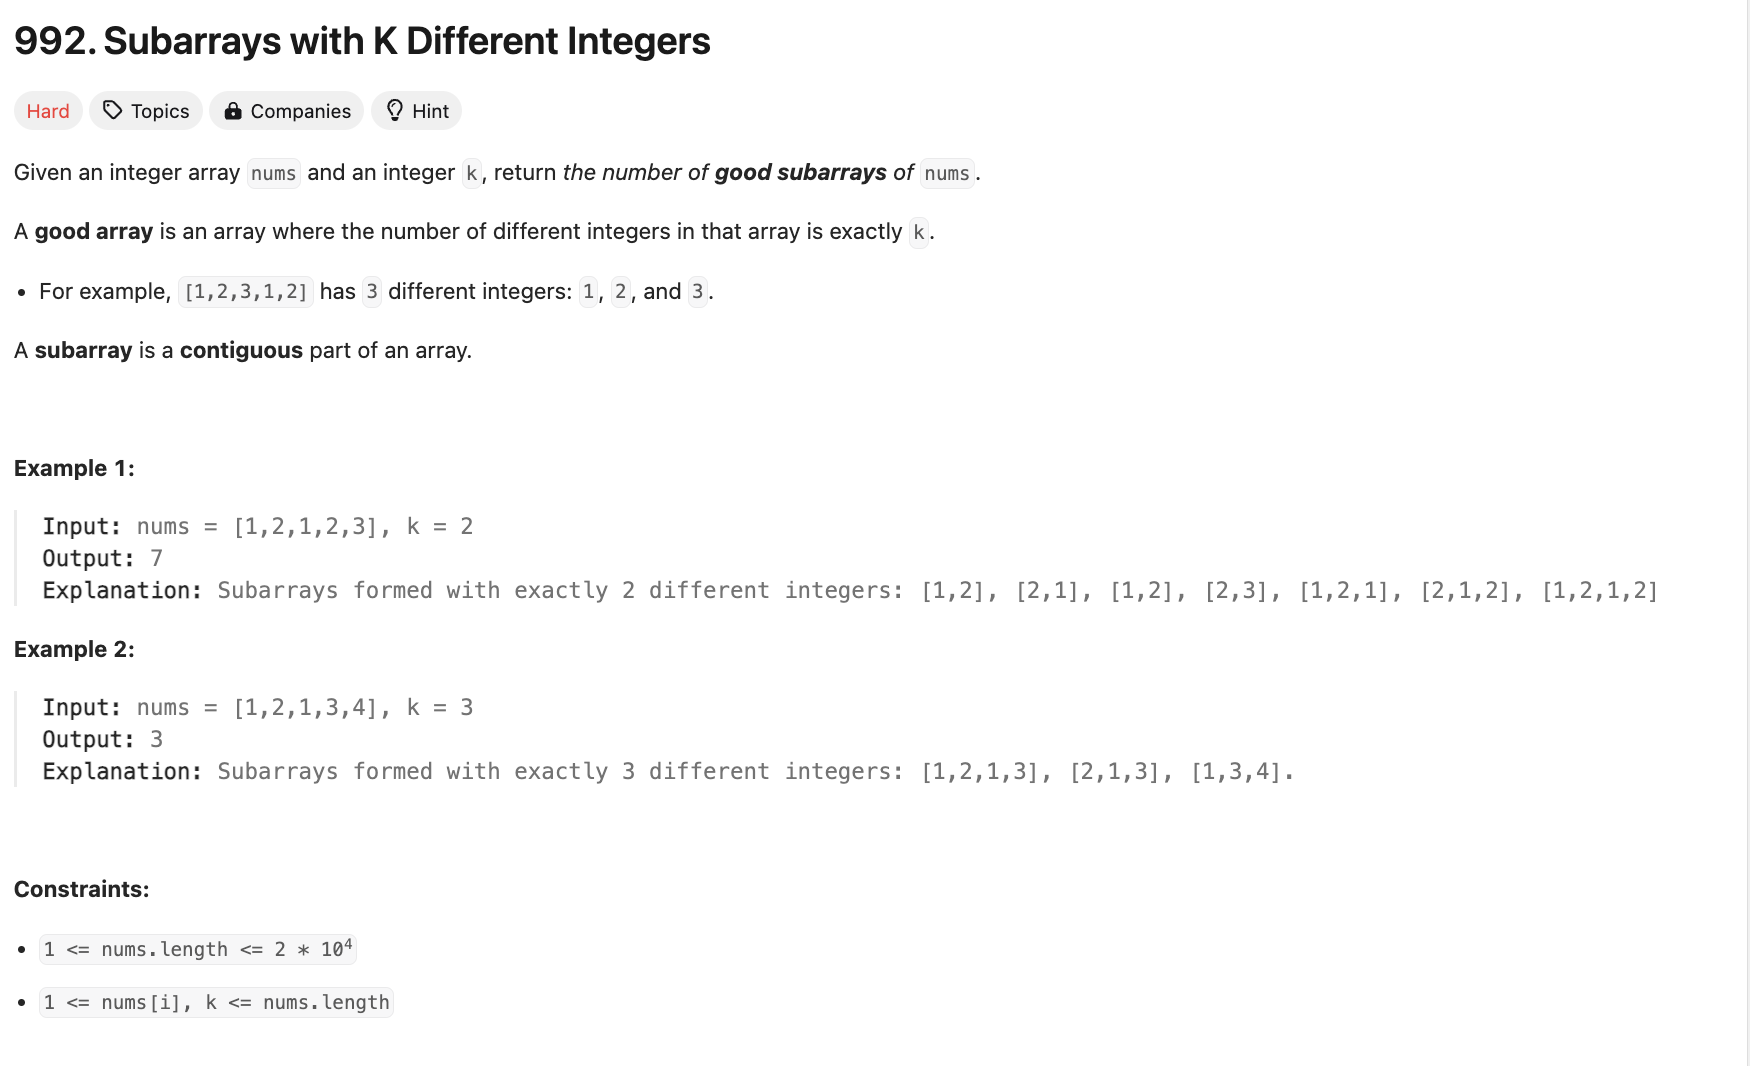

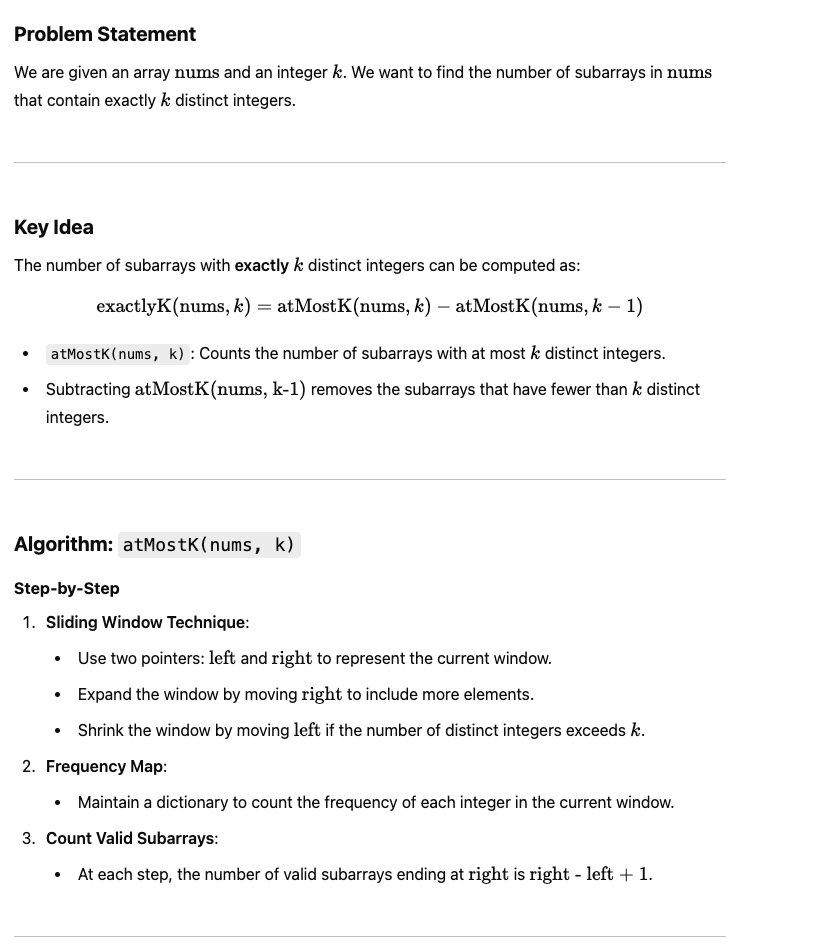

In [55]:
from collections import defaultdict

class Solution:
    def subarraysWithKDistinct(self, nums: List[int], k: int) -> int:
        def atMostK(k):
            my_dict = defaultdict(int)
            left = 0
            count = 0
            
            for right in range(len(nums)):
                my_dict[nums[right]] += 1
                #print(my_dict)

                #print(len(my_dict), k)
                
                while len(my_dict) > k:
                    my_dict[nums[left]] -= 1
                    if my_dict[nums[left]] == 0:
                        del my_dict[nums[left]]
                    left += 1
                
                # Add the number of subarrays ending at `right`
                
                count += right - left + 1
                print(count,left,right, nums[left:right])
            
            return count
        
        # Use the formula: exactlyK = atMostK(k) - atMostK(k - 1)
        return atMostK(k) - atMostK(k - 1)


In [56]:
nums = [1, 2, 1, 2, 3]
k = 2

solution = Solution()
print(solution.subarraysWithKDistinct(nums, k))


1 0 0 []
3 0 1 [1]
6 0 2 [1, 2]
10 0 3 [1, 2, 1]
12 3 4 [2]
1 0 0 []
2 1 1 []
3 2 2 []
4 3 3 []
5 4 4 []
7


In [51]:
def atMostK(k):
    my_dict = defaultdict(int)
    left = 0
    count = 0
    
    for right in range(len(nums)):
        my_dict[nums[right]] += 1
        print(my_dict)

        print(len(my_dict), k)
        
        print("before",count,left,right, nums[left:right])
        while len(my_dict) > k:
            my_dict[nums[left]] -= 1
            if my_dict[nums[left]] == 0:
                del my_dict[nums[left]]
            left += 1
        # Add the number of subarrays ending at `right`
        print("after",count,left,right, nums[left:right])
        count += right - left + 1
        print(count)
    
    return count

In [52]:
nums = [1, 2, 1, 2, 3,8]
k = 2

atMostK(k)

defaultdict(<class 'int'>, {1: 1})
1 2
before 0 0 0 []
after 0 0 0 []
1
defaultdict(<class 'int'>, {1: 1, 2: 1})
2 2
before 1 0 1 [1]
after 1 0 1 [1]
3
defaultdict(<class 'int'>, {1: 2, 2: 1})
2 2
before 3 0 2 [1, 2]
after 3 0 2 [1, 2]
6
defaultdict(<class 'int'>, {1: 2, 2: 2})
2 2
before 6 0 3 [1, 2, 1]
after 6 0 3 [1, 2, 1]
10
defaultdict(<class 'int'>, {1: 2, 2: 2, 3: 1})
3 2
before 10 0 4 [1, 2, 1, 2]
after 10 3 4 [2]
12
defaultdict(<class 'int'>, {2: 1, 3: 1, 8: 1})
3 2
before 12 3 5 [2, 3]
after 12 4 5 [3]
14


14

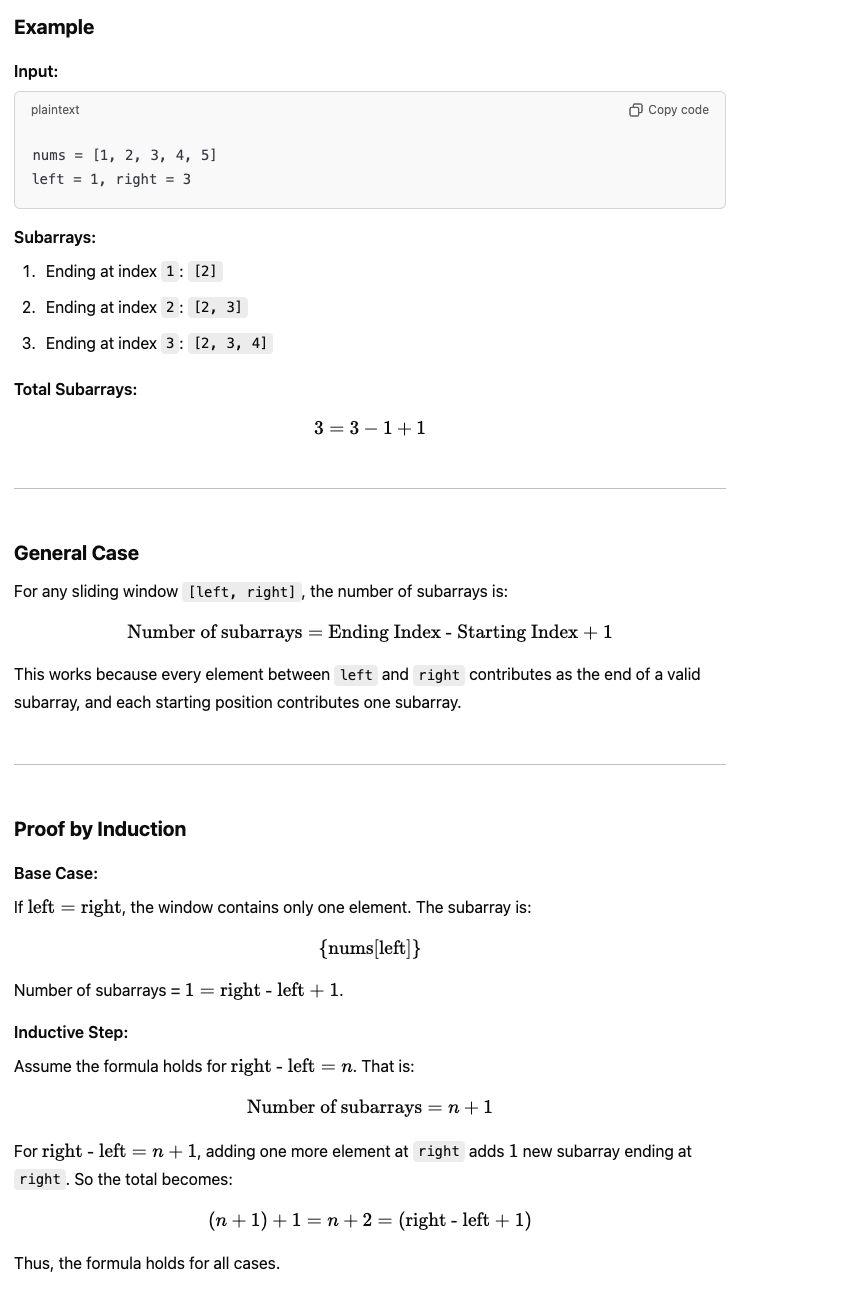

************************************************************************************************************************************************************************************************************

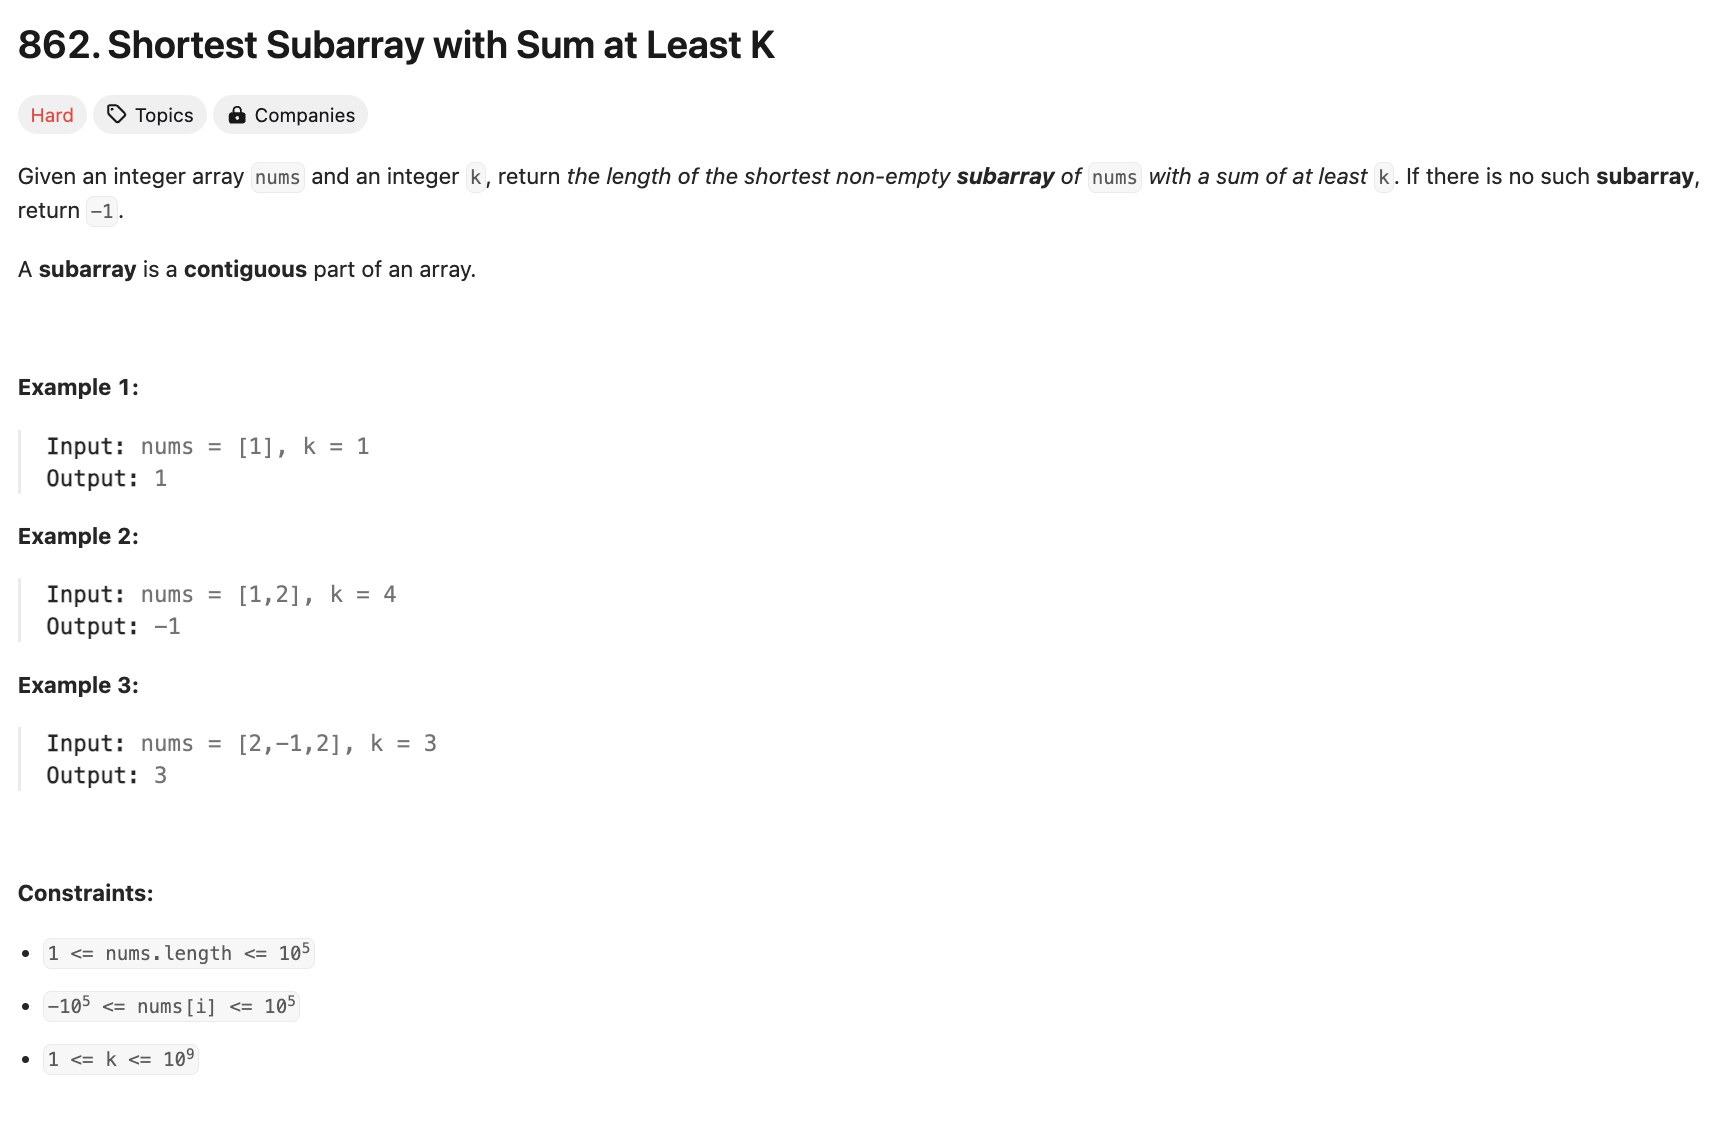

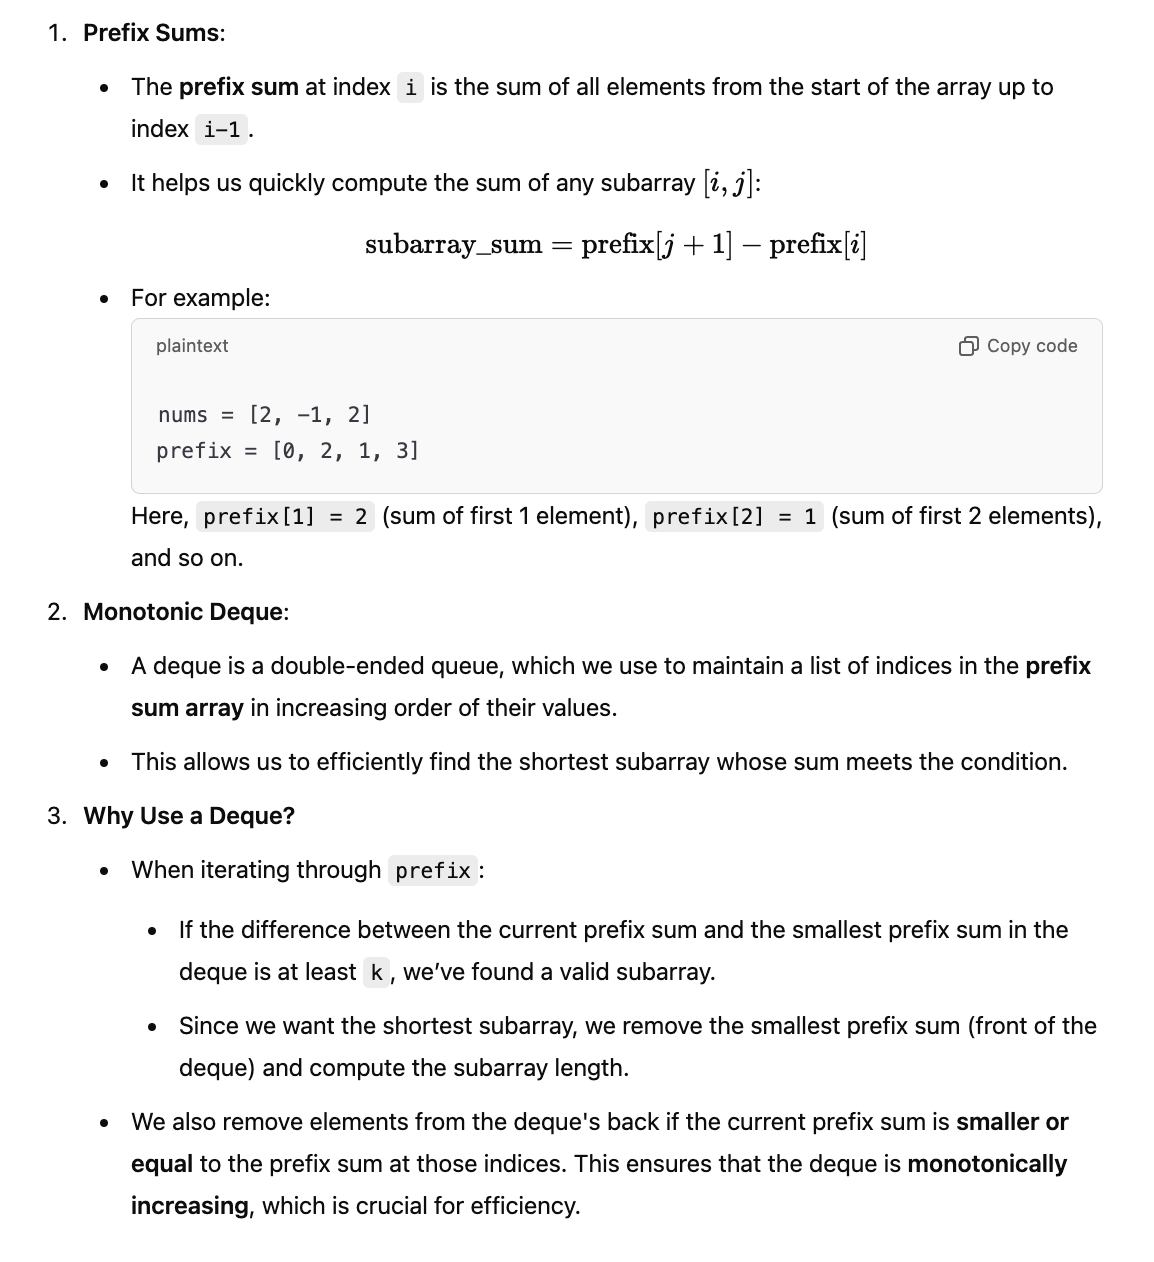

In [57]:
from collections import deque

def shortest_subarray(nums, k):
    n = len(nums)
    prefix = [0] * (n + 1)  # Compute prefix sum
    for i in range(n):
        prefix[i + 1] = prefix[i] + nums[i]
    
    result = float('inf')  # Initialize result as infinity
    dq = deque()  # Monotonic deque
    
    for i in range(len(prefix)):
        # Check if we can remove from front of deque
        while dq and prefix[i] - prefix[dq[0]] >= k:
            result = min(result, i - dq.popleft())
        
        # Maintain monotonicity of deque
        while dq and prefix[i] <= prefix[dq[-1]]:
            dq.pop()
        
        dq.append(i)  # Add current index to deque
    
    return result if result != float('inf') else -1


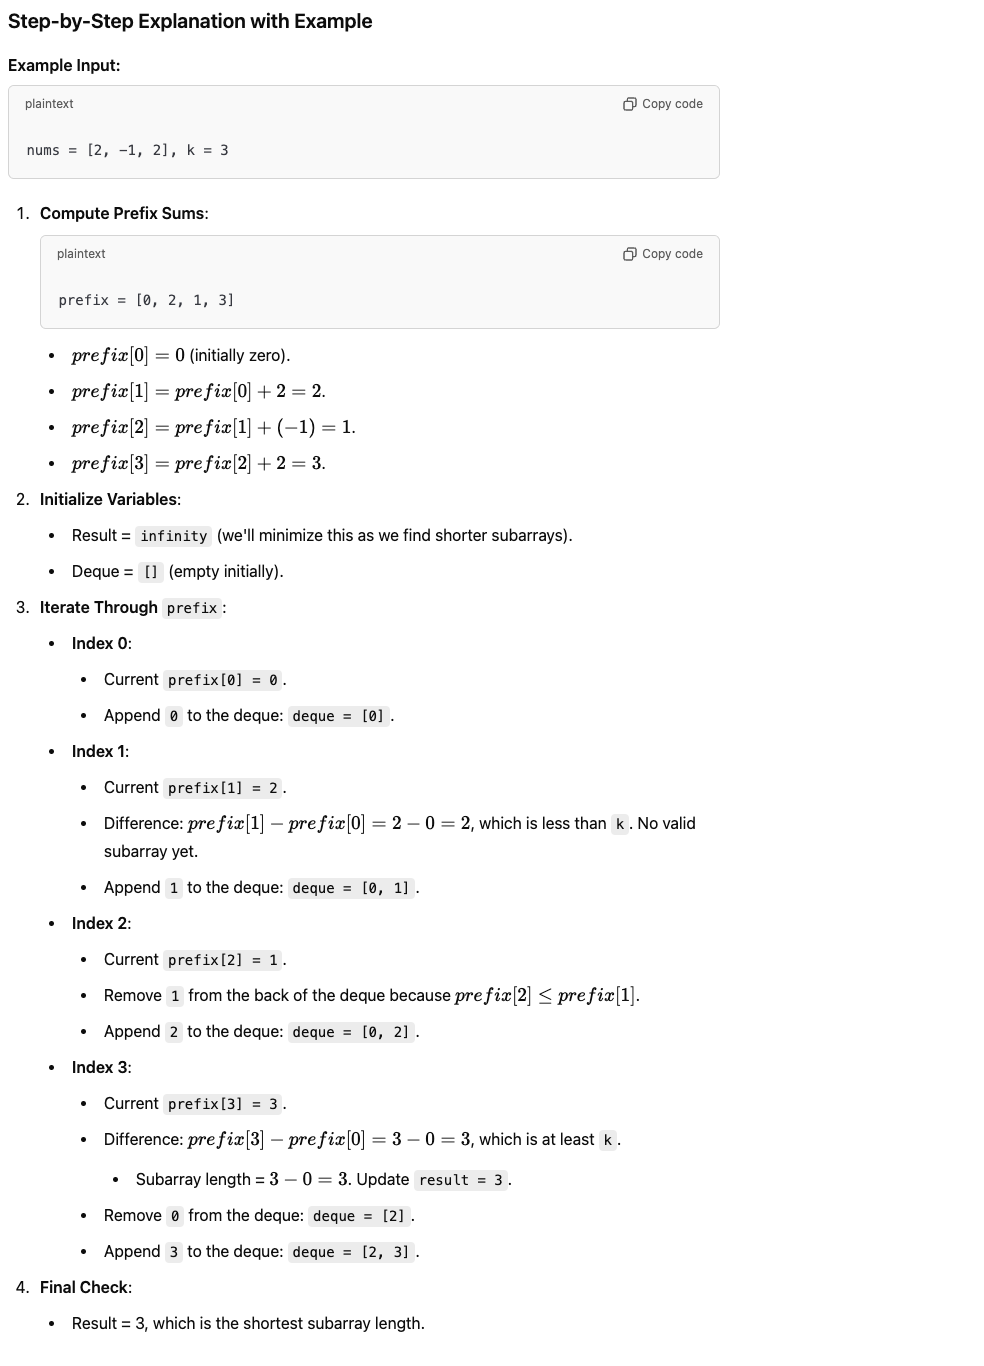

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************